In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,CuDNNLSTM
import matplotlib.pyplot as plt

In [0]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
model= Sequential()

In [45]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
model.add(CuDNNLSTM(128,input_shape=(x_train.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [47]:
opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 52s 872us/sample - loss: 0.4336 - acc: 0.8660 - val_loss: 0.1616 - val_acc: 0.9556
Epoch 2/3
60000/60000 [==============================] - 49s 820us/sample - loss: 0.1280 - acc: 0.9659 - val_loss: 0.1106 - val_acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 49s 820us/sample - loss: 0.0896 - acc: 0.9766 - val_loss: 0.1585 - val_acc: 0.9575


9


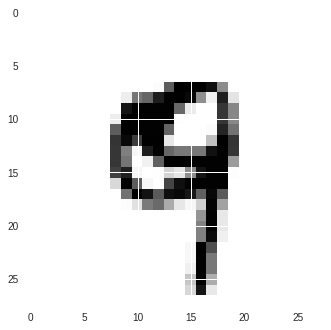

In [60]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28))
print(pred.argmax())